In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random


In [43]:
# Letter Recognition Dataset
data= fetch_ucirepo(id=59)
X = data.data.features
y = data.data.targets.squeeze()

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
all_results = []
top_score = 0
best_log = None


In [47]:
for sample in range(10):
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=100 + sample, stratify=y)
    train_subset = X_train_full[:50]
    label_subset = y_train_full[:50]

    best_accuracy = 0
    best_params = {}
    logs = []

In [49]:
for iteration in range(100):  # You can try 300 if needed
        kernel = random.choice(kernel_options)
        C = round(random.uniform(0.1, 5.0), 2)
        gamma = round(random.uniform(0.001, 1.0), 3)

        try:
            clf = SVC(kernel=kernel, C=C, gamma=gamma)
            clf.fit(train_subset, label_subset)
            preds = clf.predict(X_test)
            acc = accuracy_score(y_test, preds) * 100
        except:
            acc = 0

        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {
                "kernel": kernel,
                "C": C,
                "gamma": gamma
            }

        logs.append({
            "Iteration": iteration,
            "Best Accuracy": round(best_accuracy, 2),
            "Kernel": best_params.get("kernel", ""),
            "C": best_params.get("C", 0),
            "Gamma": best_params.get("gamma", 0),
            "Sample": sample + 1
        })

In [51]:
all_results.append({
        "Sample": sample + 1,
        "Best Accuracy": round(best_accuracy, 2),
        **best_params
})

if best_accuracy > top_score:
        top_score = best_accuracy
        best_log = pd.DataFrame(logs)

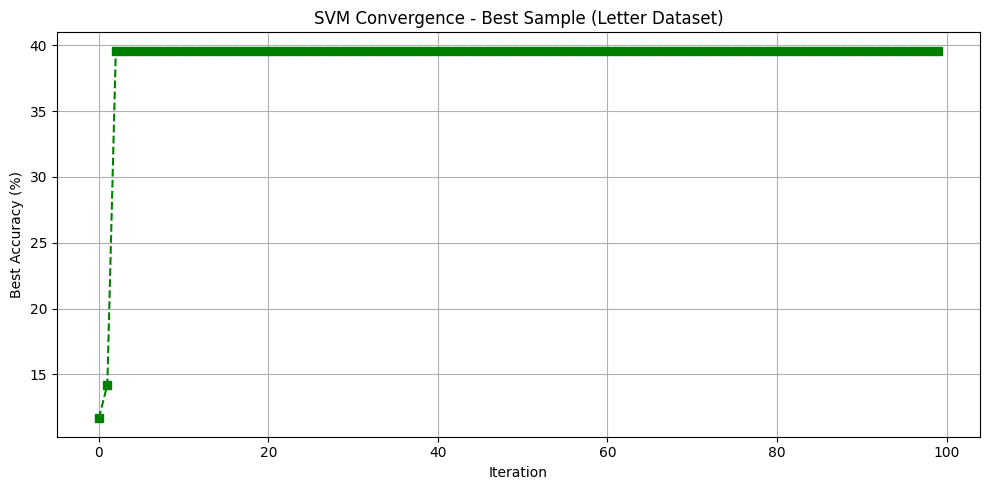

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(best_log["Iteration"], best_log["Best Accuracy"],
         color="green", linestyle='--', marker='s')
plt.title("SVM Convergence - Best Sample (Letter Dataset)")
plt.xlabel("Iteration")
plt.ylabel("Best Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig("letter_convergence.png")
plt.show()


In [54]:
summary_df = pd.DataFrame(all_results)
print(summary_df)
summary_df.to_csv("svm_letter_summary.csv", index=False)

   Sample  Best Accuracy  kernel     C  gamma
0      10          39.58  linear  4.94  0.713
